In [ ]:
import numpy as np
import keras
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential  #用來啟動 NN
from keras.layers import Conv2D,Conv1D,Reshape # Convolution Operation
from keras.layers import MaxPooling2D,MaxPooling1D # Pooling
from keras.layers import Flatten
from keras.layers import Dense,Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers.core import Dense,Dropout, Activation
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train_DG = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG_500.csv')
df_test = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/test.csv')

### reshape data

In [ ]:
X_train_DG = df_train_DG.iloc[: , 1:-1]
y_train_DG = df_train_DG.iloc[: , -1:].values.ravel()
print(X_train_DG.shape)
print(y_train_DG.shape)

X_test = df_test.iloc[: , 1:-1]
y_test = df_test.iloc[: , -1:].values.ravel()

print(X_test.shape)
print(y_test.shape)

X_train_DG = np.array(X_train_DG).reshape(X_train_DG.shape[0],256,256,1)
X_test = np.array(X_test).reshape(X_test.shape[0],256,256,1)


(1500, 65536)
(1500,)
(66, 65536)
(66,)


In [ ]:
y_train_DG

array(['C', 'C', 'C', ..., 'N', 'N', 'N'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import *
label_encoder = LabelEncoder()
y_train_DG = to_categorical(label_encoder.fit_transform(y_train_DG),3)
y_test = to_categorical(label_encoder.fit_transform(y_test),3)
print(y_train_DG.shape)
print(y_test.shape)

(1500, 3)
(66, 3)


In [ ]:
label_encoder.classes_

array(['C', 'N', 'V'], dtype=object)

In [ ]:
model = Sequential()  
model.add(Conv2D(64, 8, 8, input_shape = (X_train_DG.shape[1],X_train_DG.shape[2],1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# Second convolutional layer
model.add(Conv2D(32, 8, 8, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        4160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 32)          131104    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train_DG, y_train_DG,batch_size=32,epochs=100,callbacks=[callback])
Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_argmax, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test_argmax, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test_argmax, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test_argmax, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test_argmax, y_pred)
print('confusion matrix')
print(cm)

Epoch 1/100
47/47 [==============================] - 1s 9ms/step - loss: 1.0981 - accuracy: 0.3704
Epoch 2/100
47/47 [==============================] - 0s 9ms/step - loss: 0.9894 - accuracy: 0.5035
Epoch 3/100
47/47 [==============================] - 0s 8ms/step - loss: 0.8227 - accuracy: 0.6323
Epoch 4/100
47/47 [==============================] - 0s 8ms/step - loss: 0.7155 - accuracy: 0.7021
Epoch 5/100
47/47 [==============================] - 0s 8ms/step - loss: 0.6653 - accuracy: 0.7274
Epoch 6/100
47/47 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.7313
Epoch 7/100
47/47 [==============================] - 0s 8ms/step - loss: 0.6317 - accuracy: 0.7374
Epoch 8/100
47/47 [==============================] - 0s 8ms/step - loss: 0.5578 - accuracy: 0.7556
Epoch 9/100
47/47 [==============================] - 0s 8ms/step - loss: 0.5064 - accuracy: 0.7891
Epoch 10/100
47/47 [==============================] - 0s 8ms/step - loss: 0.4816 - accuracy: 0.8102
Epoch 11/

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


accuracy: 0.8333333333333334
precision: 0.8511904761904763
recall: 0.8320512820512821
f1: 0.8287037037037036
confusion matrix
[[22  1  3]
 [ 0 14  6]
 [ 0  1 19]]


## Grad_CAM

In [ ]:
from keras.preprocessing import image
import numpy as np
import cv2
import keras.backend as K
from skimage import io

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        4160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 32)          131104    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

conv2d_6
max_pooling2d_6
conv2d_7
max_pooling2d_7
flatten_3
dropout_6
dense_6
dropout_7
dense_7


In [ ]:
from google.colab.patches import cv2_imshow

(256, 256) (256, 256, 3)


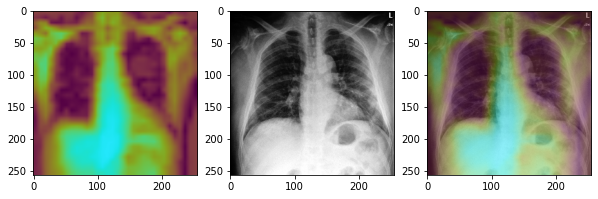

In [ ]:
index = 25
icam = GradCAM(model, 0, 'conv2d_6') 
heatmap = icam.compute_heatmap(np.array([X_train_DG[index]]))
heatmap = cv2.resize(heatmap, (256, 256))

image = cv2.imread("/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/Covid/0"+str(index+2)+".jpeg")
image = cv2.resize(image, (256, 256))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(heatmap)
plt.subplot(1,3,2)
plt.imshow(image)
plt.subplot(1,3,3)
plt.imshow(output)

(256, 256) (256, 256, 3)


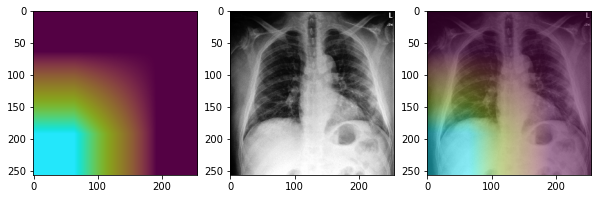

In [ ]:
index = 25
icam = GradCAM(model, 0, 'conv2d_7') 
heatmap = icam.compute_heatmap(np.array([X_train_DG[index]]))
heatmap = cv2.resize(heatmap, (256, 256))

image = cv2.imread("/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/Covid/0"+str(index+2)+".jpeg")
image = cv2.resize(image, (256, 256))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(heatmap)
plt.subplot(1,3,2)
plt.imshow(image)
plt.subplot(1,3,3)
plt.imshow(output)

(256, 256) (256, 256, 3)


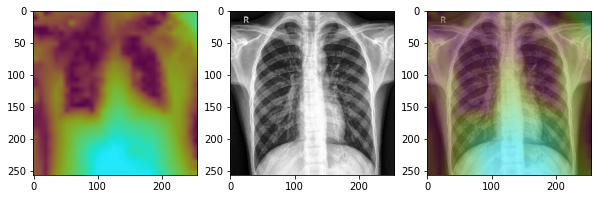

In [ ]:
index = 23
icam = GradCAM(model, 0, 'conv2d_6') 
heatmap = icam.compute_heatmap(np.array([X_train_DG[index]]))
heatmap = cv2.resize(heatmap, (256, 256))

image = cv2.imread("/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/Normal/0"+str(index+2)+".jpeg")
image = cv2.resize(image, (256, 256))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(heatmap)
plt.subplot(1,3,2)
plt.imshow(image)
plt.subplot(1,3,3)
plt.imshow(output)

(256, 256) (256, 256, 3)


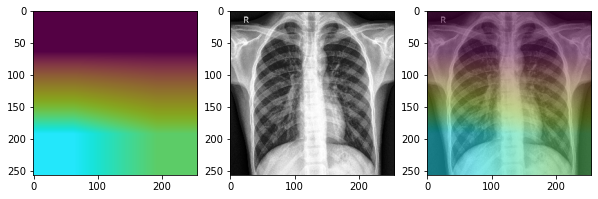

In [ ]:
index = 23
icam = GradCAM(model, 0, 'conv2d_7') 
heatmap = icam.compute_heatmap(np.array([X_train_DG[index]]))
heatmap = cv2.resize(heatmap, (256, 256))

image = cv2.imread("/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/Normal/0"+str(index+2)+".jpeg")
image = cv2.resize(image, (256, 256))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(heatmap)
plt.subplot(1,3,2)
plt.imshow(image)
plt.subplot(1,3,3)
plt.imshow(output)

(256, 256) (256, 256, 3)


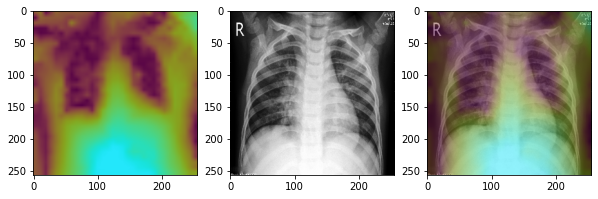

In [ ]:
index = 23
icam = GradCAM(model, 0, 'conv2d_6') 
heatmap = icam.compute_heatmap(np.array([X_train_DG[index]]))
heatmap = cv2.resize(heatmap, (256, 256))

image = cv2.imread("/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/Viral Pneumonia/0"+str(index+2)+".jpeg")
image = cv2.resize(image, (256, 256))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(heatmap,cmap="hot")
plt.subplot(1,3,2)
plt.imshow(image)
plt.subplot(1,3,3)
plt.imshow(output)

(256, 256) (256, 256, 3)


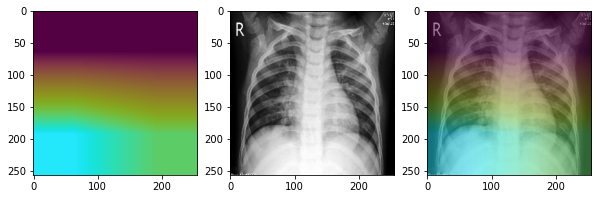

In [ ]:
index = 23
icam = GradCAM(model, 0, 'conv2d_7') 
heatmap = icam.compute_heatmap(np.array([X_train_DG[index]]))
heatmap = cv2.resize(heatmap, (256, 256))

image = cv2.imread("/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/Viral Pneumonia/0"+str(index+2)+".jpeg")
image = cv2.resize(image, (256, 256))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(heatmap,cmap="hot")
plt.subplot(1,3,2)
plt.imshow(image)
plt.subplot(1,3,3)
plt.imshow(output)

In [ ]:
heatmap.shape

(256, 256, 3)

(256, 256) (256, 256, 3)


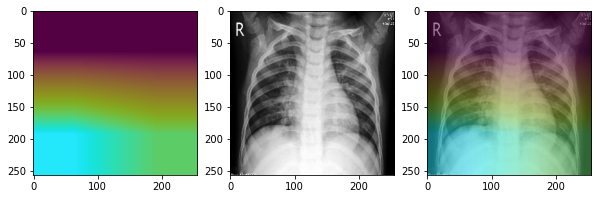

In [ ]:
index = 23
icam = GradCAM(model, 0, 'conv2d_7') 
heatmap = icam.compute_heatmap(np.array([X_train_DG[index]]))
heatmap = cv2.resize(heatmap, (256, 256))

image = cv2.imread("/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/Viral Pneumonia/0"+str(index+2)+".jpeg")
image = cv2.resize(image, (256, 256))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(heatmap)
plt.subplot(1,3,2)
plt.imshow(image)
plt.subplot(1,3,3)
plt.imshow(output)

## LIME

In [ ]:
from skimage.data import astronaut
from skimage.segmentation import slic
from scipy.spatial import Delaunay
from skimage.segmentation import mark_boundaries
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
import copy

In [ ]:
label_encoder.classes_

array(['C', 'N', 'V'], dtype=object)

In [ ]:
def LIME(index):
  img = X_train_DG[index].reshape(256,256)
  print("<real>")
  print(y_train_DG[index])
  print("<predict>")
  print(label_encoder.classes_,model.predict(np.array([X_train_DG[index]])))
  # SLIC
  segments = slic(img, n_segments=60, compactness=0.5)
  segments_ids = np.unique(segments)

  # centers
  centers = np.array([np.mean(np.nonzero(segments==i),axis=1) for i in segments_ids])

  vs_right = np.vstack([segments[:,:-1].ravel(), segments[:,1:].ravel()])
  vs_below = np.vstack([segments[:-1,:].ravel(), segments[1:,:].ravel()])
  bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)

  fig = plt.figure(figsize=(6,6))
  plt.title("image superpixel")
  plt.imshow(mark_boundaries(img, segments))
  num_superpixels = segments_ids.shape[0]
  num_perturb = 60
  perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))

  #Create function to apply perturbations to images
  def perturb_image(img,perturbation,segments): 
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
    perturbed_image = copy.deepcopy(img)
    perturbed_image = perturbed_image*mask[:,:]
    return perturbed_image

  predictions = []
  for pert in perturbations:
    perturbed_img = perturb_image(img,pert,segments)
    perturbed_img = perturbed_img.reshape(1,256,256,1)
    pred = model.predict(perturbed_img)
    predictions.append(pred)

  predictions = np.array(predictions)
  #Compute distances to original image
  import sklearn.metrics
  original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
  distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()

  #Transform distances to a value between 0 an 1 (weights) using a kernel function
  kernel_width = 0.25
  weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
  from sklearn.linear_model import LinearRegression
  plt.figure(figsize=(20,10))
  for i in range(3):
    class_to_explain = i
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
    coeff = simpler_model.coef_[0]

    #Use coefficients from linear model to extract top features
    num_top_features = 12
    top_features = np.argsort(coeff)[-num_top_features:] 

    #Show only the superpixels corresponding to the top features
    mask = np.zeros(num_superpixels) 
    mask[top_features]= True #Activate top superpixels
    plt.subplot(1, 3, i+1)
    plt.title(label_encoder.classes_[i]+" important parts")
    plt.imshow(perturb_image(img,mask,segments),cmap="gray")

<real>
[1. 0. 0.]
<predict>
['C' 'N' 'V'] [[0.7464564  0.1557331  0.09781057]]


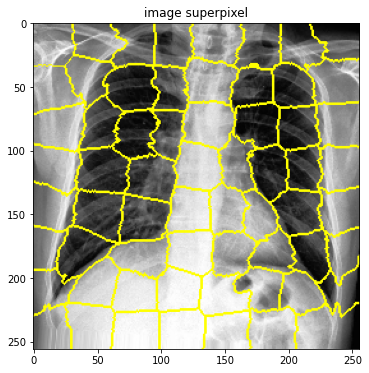

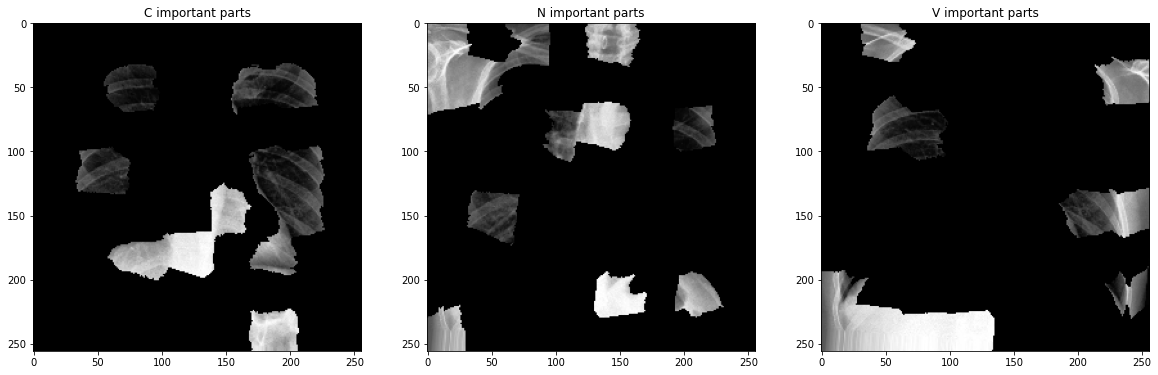

In [ ]:
LIME(150)

<real>
[0. 0. 1.]
<predict>
['C' 'N' 'V'] [[2.4398946e-07 8.8506390e-04 9.9911469e-01]]


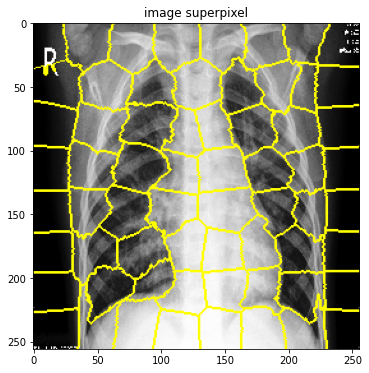

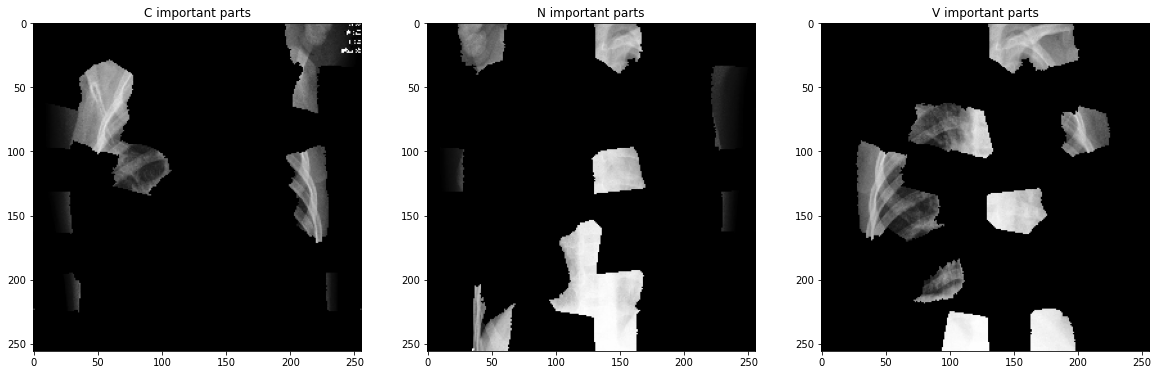

In [ ]:
LIME(500)

<real>
[0. 1. 0.]
<predict>
['C' 'N' 'V'] [[2.6302438e-05 9.9662954e-01 3.3441919e-03]]


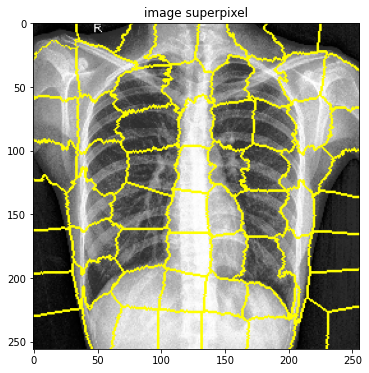

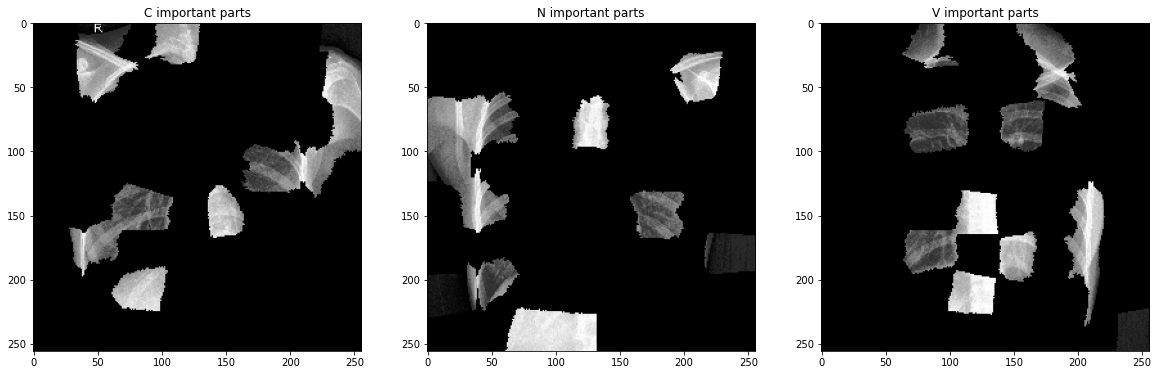

In [ ]:
LIME(1000)